### Question II. Simplified Stock prediction (12pts)

The lines below can be used to download stock values. As you can see, we will focus on the evolution of the Google stock between December 1st 2004 and October 14th 2005. 

[*********************100%***********************]  1 of 1 completed


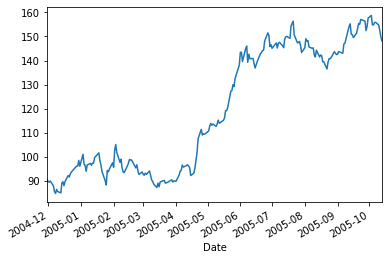

In [4]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2004-12-01','2005-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

#### Question II.1. (5pts)

Now that you have tested your linear regression implementations, we will turn to the regression implementation of scikit-learn. In this exercise, we will use scikit learn to fit a simplified prediction model. We will take an order $p$ prediction model for $p=50$, that is a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i}$$

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression(fit_intercept=True)
predictions = [0, 0, 0, 0, 0] #First 5 values could not be predicted

p = 5

for t in range(p, len(data['Adj Close'])):
    X_train = np.array(range(0,p)) 
    y_train = np.array(data['Adj Close'][(t-p):t]) 
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regressor.fit(X_train, y_train)
    prediction = regressor.predict(np.array([5]).reshape(-1, 1))
    predictions.append(prediction[0][0])  


data['predictions_5'] = predictions

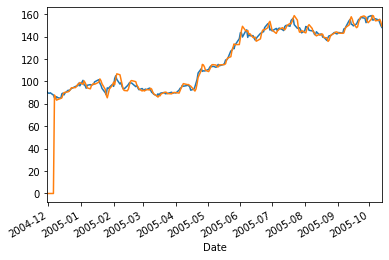

In [48]:
data['Adj Close'].plot()
data['predictions_5'].plot()
plt.show()

In [49]:
#MSE calculation

np.mean((data['Adj Close'][p:] - data['predictions_5'][p:])**2)

8.155968694703256

#### Question II.2. (5pts)

On top of the previous values, we would like to capture seasonal trends. Although we would ideally need more than one year of data, we stick to the dataset that you downloaded above. Add a variable to your model that encodes the day of the year at which the stock value is measured. I.e. we want a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i} + \alpha_{P+1} t$$

where $t_i$ encodes the time information (this should be a single number between $1$ and $365$)

In [41]:
data['timing'] = range(1, len(data) + 1)

In [42]:
data.head()


,Open,High,Low,Close,Adj Close,Volume,predictions_5,timing
Date,,,,,,,,
2004-11-30,90.017593,91.158318,89.788452,90.650223,90.650223,15457600,0.0,1
2004-12-01,90.635277,90.909248,89.439758,89.643990,89.643990,15787100,0.0,2
2004-12-02,89.614105,90.416100,88.941628,89.365036,89.365036,12568700,0.0,3
2004-12-03,89.639008,90.191940,88.468399,89.863174,89.863174,11782300,0.0,4
2004-12-06,89.230545,90.012611,87.681351,87.815842,87.815842,12554800,0.0,5


In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

regressor = LinearRegression(fit_intercept=True)
predictions = [0, 0, 0, 0, 0] #First 5 values could not be predicted

p = 5

for t in range(p, len(data['Adj Close'])):
    count = np.array(range(0,p))
    days = data['timing'][(t-p):t]
    X_train = pd.DataFrame({'count': count, 'days': days})
    y_train = np.array(data['Adj Close'][(t-p):t])
    y_train = y_train.reshape(-1, 1)
    regressor.fit(X_train, y_train)
    prediction = regressor.predict(pd.DataFrame({'count': np.array([p]), 'days': np.array(t)}))
    predictions.append(prediction[0][0])  


data['predictions_timing'] = predictions

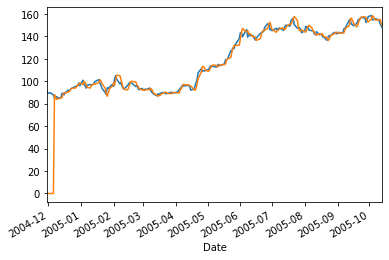

In [53]:
data['Adj Close'].plot()
data['predictions_timing'].plot()
plt.show()

In [54]:
#MSE calculation

np.mean((data['Adj Close'][p:] - data['predictions_timing'][p:])**2)

7.077954732024386

In [ ]:
# Mean squared error reduced